**Import Library**

**Chronic Kidney Disease**

Dataset ini dapat digunakan untuk memprediksi penyakit ginjal kronis dan dapat dikumpulkan dari rumah sakit dalam jangka waktu hampir 2 bulan.

**Informasi Dataset**

Dalam dataset ini menggunakan 24 + kelas = 25 (11 numerik, 14 nominal), berikut adalah keterangannya:

1. **age** - Age(numerical): age in years
2. **bp** - Blood Pressure(numerical): bp in mm/Hg
3. **al** - Albumin(nominal): al - (0,1,2,3,4,5)
4. **sg** - Specific Gravity(nominal): sg - (1.005,1.010,1.015,1.020,1.025)
5. **su** - Sugar(nominal): su - (0,1,2,3,4,5)
6. **rbc** - Red Blood Cells(nominal): rbc - (normal,abnormal)
7. **pc** - Pus Cell (nominal): pc - (normal,abnormal)
8. **pcc** - Pus Cell clumps(nominal): pcc - (present,notpresent)
9. **ba** - Bacteria(nominal): ba  - (present,notpresent)
10. **bgr** - Blood Glucose Random(numerical): bgr in mgs/dl
11. **bu** - Blood Urea(numerical): bu in mgs/dl
12. **sc** - Serum Creatinine(numerical): sc in mgs/dl
13. **sod** - Sodium(numerical): sod in mEq/L
14. **pot** - Potassium(numerical): pot in mEq/L
15. **hemo** - Hemoglobin(numerical): hemo in gms
16. **pcv** - Packed  Cell Volume(numerical)
17. **wc** - White Blood Cell Count(numerical): wc in cells/cumm
18. **rc** - Red Blood Cell Count(numerical): rc in millions/cmm
19. **htn** - Hypertension(nominal): htn - (yes,no)
20. **dm** - Diabetes Mellitus(nominal): dm - (yes,no)
21. **cad** - Coronary Artery Disease(nominal): cad - (yes,no)
22. **appt** - Appetite(nominal): appet - (good,poor)
23. **pe** - Pedal Edema(nominal): pe - (yes,no)
24. **ane** -  Anemia(nominal): ane - (yes,no)
25. **classification** - Class (nominal): class - (ckd,notckd)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Library**

In [ ]:
import pandas as pd #untuk memproses data, manipulasi data, dan analisis data
import numpy as np #fungsi untuk aljabar linier dan pembuatan bilangan acak
import matplotlib.pyplot as plt #untuk visualisasi data seperti plot, histogram, bar chart, dll
%matplotlib inline
import seaborn as sns #untuk menampilkan visualisasi data lebih menarik
import warnings

#--Sklearn library-- membantu melakukan processing data ataupun melakukan training data
from sklearn.preprocessing import LabelEncoder #untuk mengkodekan label atau variabel target dalam bentuk teks (kategorikal) menjadi bentuk numerik.
from sklearn.decomposition import PCA #untuk mereduksi data menggunakan metode PCA
from sklearn.model_selection import train_test_split #membagi data secara acak
from sklearn.metrics import confusion_matrix, classification_report #untuk memplot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #untuk memplot confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score #model performance

from sklearn import metrics #untuk mengukur kinerja model machine learning dengan berbagai metrik evaluasi
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

**Read Data**

In [ ]:
# melakukan import data
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/kidney_disease.csv")

In [ ]:
# melihat banyak kolom dan baris
print(f'{df.shape[0]} rows and {df.shape[1]} columns')

400 rows and 26 columns


In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [ ]:
# melakukan drop pada kolom "id"
df.drop('id', axis = 1, inplace = True)

In [ ]:
# menganti nama kolom agar lebih mudah di olah

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


**Data Exploration**

In [ ]:
#mengetahui nama kolom/fitur
print ("Features : \n\n", df.columns.tolist())

Features : 

 ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

Seperti yang  terlihat bahwa **'packed_cell_volume'**, **'white_blood_cell_count'** dan **'red_blood_cell_count'** adalah tipe objek. Maka, perlu mengubahnya menjadi tipe numerik.

In [ ]:
# mengonversi kolom yang diperlukan menjadi tipe numerik

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
# melakukan ekstraksi pada kolom kategorikal dan numerik

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
len(cat_cols)

11

In [ ]:
len(num_cols)

14

In [ ]:
# menghitung nilai null
print ("Missing values :\n\n", df.isnull().sum().sort_values(ascending=False))

Missing values :

 red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64


In [ ]:
# menghitung nilai null pada kolom numerik
print ("Missing values :\n\n", df[num_cols].isnull().sum().sort_values(ascending=False))

Missing values :

 red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64


In [ ]:
# menghitung nilai null pada kolom kategori
print ("Missing values :\n\n", df[cat_cols].isnull().sum().sort_values(ascending=False))

Missing values :

 red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64


In [ ]:
# mengisi nilai null, kita akan menggunakan dua metode, pengambilan sampel acak untuk nilai null yang lebih tinggi dan
# mean/mode sampling untuk nilai null yang lebih rendah

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
# mengisi nilai null num_cols menggunakan metode pengambilan sampel acak

for col in num_cols:
    random_value_imputation(col)

In [ ]:
# menghitung nilai null pada kolom numerik
print ("Missing values :\n\n", df[num_cols].isnull().sum().sort_values(ascending=False))

Missing values :

 age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64


In [ ]:
# mengisi red_blood_cells" dan "pus_cell" menggunakan metode pengambilan sampel acak dan sisa cat_cols menggunakan mode imputasi

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [ ]:
# menghitung nilai null pada kolom kategori
print ("Missing values :\n\n", df[cat_cols].isnull().sum().sort_values(ascending=False))

Missing values :

 red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64


In [ ]:
# menghitung data yang duplikat
num_duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows: ", num_duplicate_rows)

Number of duplicate rows:  0


In [ ]:
# melihat nilai unik di kolom kategori

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has ['normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal'] values

pus_cell_clumps has ['notpresent' 'present'] values

bacteria has ['notpresent' 'present'] values

hypertension has ['yes' 'no'] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes'] values

coronary_artery_disease has ['no' 'yes' '\tno'] values

appetite has ['good' 'poor'] values

peda_edema has ['no' 'yes'] values

aanemia has ['no' 'yes'] values

class has ['ckd' 'ckd\t' 'notckd'] values



Terdapat beberapa nilai yang ambigu di kolom yang harus di hapus.

In [ ]:
# mengganti nilai yang salah

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [ ]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [ ]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no'] values

coronary_artery_disease has ['no' 'yes'] values

class has [0 1] values



Semua nilai yang hilang telah ditangani , sekarang masuk pada "feature encoding" pada kolom kategori

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



Karena semua kolom kategorikal memiliki 2 kategori, kita dapat menggunakan encoder label

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,131.0,...,38.0,6000.0,2.6,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [ ]:
#korelasi dengan class
corr=df.corr()
corr.sort_values(by=["class"],ascending=False).iloc[0].sort_values(ascending=False)

class                      1.000000
haemoglobin                0.684035
specific_gravity           0.652922
packed_cell_volume         0.632957
red_blood_cell_count       0.496975
pus_cell                   0.383344
red_blood_cells            0.365985
sodium                     0.330631
potassium                 -0.061410
white_blood_cell_count    -0.167714
bacteria                  -0.186871
age                       -0.219999
coronary_artery_disease   -0.236088
pus_cell_clumps           -0.265313
blood_pressure            -0.274803
serum_creatinine          -0.292394
sugar                     -0.304373
aanemia                   -0.325396
blood_urea                -0.360968
peda_edema                -0.375154
appetite                  -0.393341
blood_glucose_random      -0.398774
diabetes_mellitus         -0.559060
albumin                   -0.580821
hypertension              -0.590438
Name: class, dtype: float64

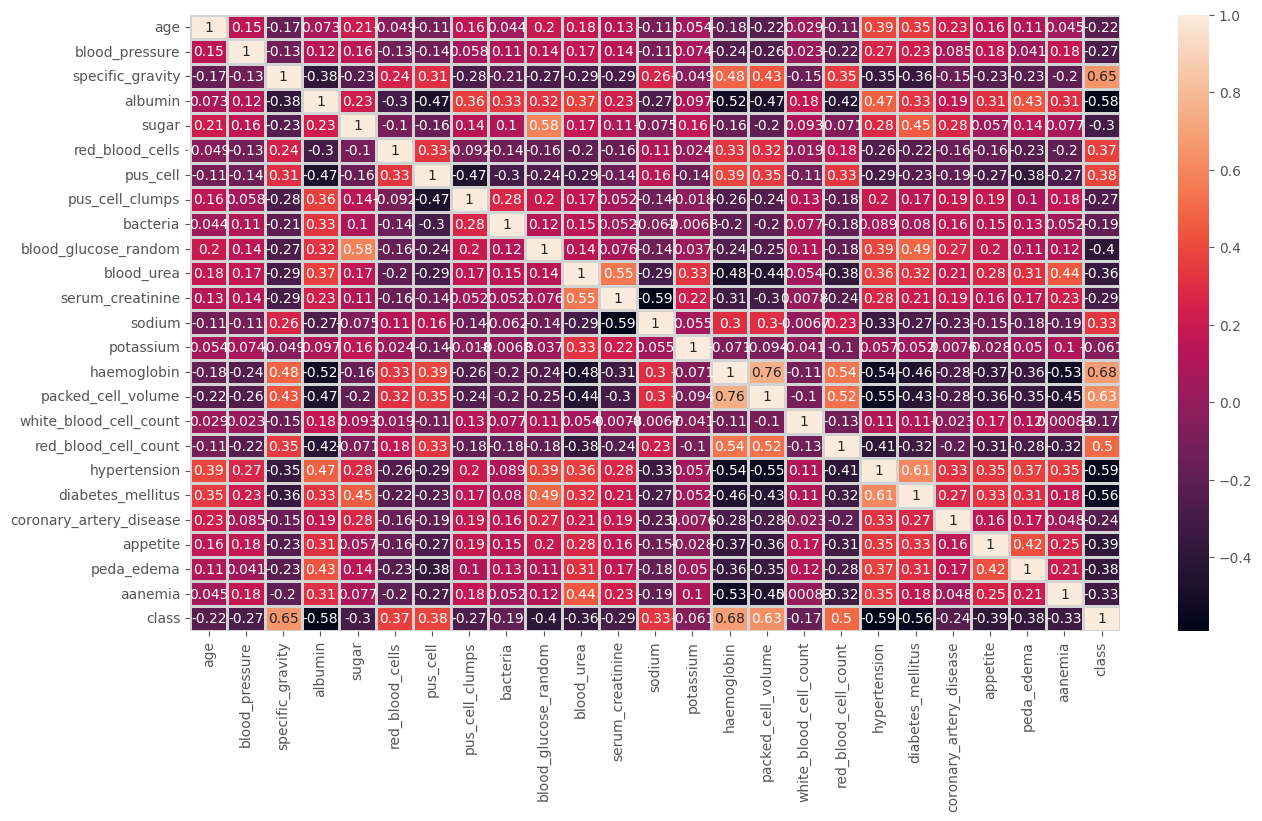

In [ ]:
# heatmap korelasi data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

**Data Visualization**

In [ ]:
# Membuat scaling data method
def scaling_check(data):

    case_count = df['class'].value_counts()
    print('Legend:')
    print(case_count)

    plt.figure(figsize=(10,6))
    sns.barplot(x=case_count.index, y=case_count.values)
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.title('Data Distribution', fontsize=16)
    plt.xlabel('Chronic Kidney Disease', fontsize=12)
    plt.ylabel('Number of Chronic Kidney Disease', fontsize=12)
    plt.xticks(range(len(case_count.index)), ['Chronic Kidney Disease(0)', 'Not Chronic Kidney Disease (1)'])
    plt.show()

Legend:
0    250
1    150
Name: class, dtype: int64


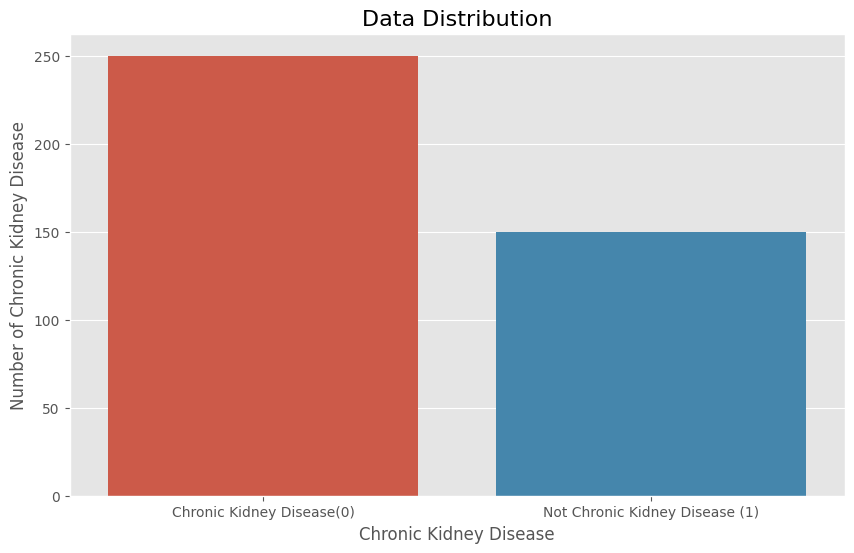

In [ ]:
# Mengecek distribusi data
scaling_check(df)

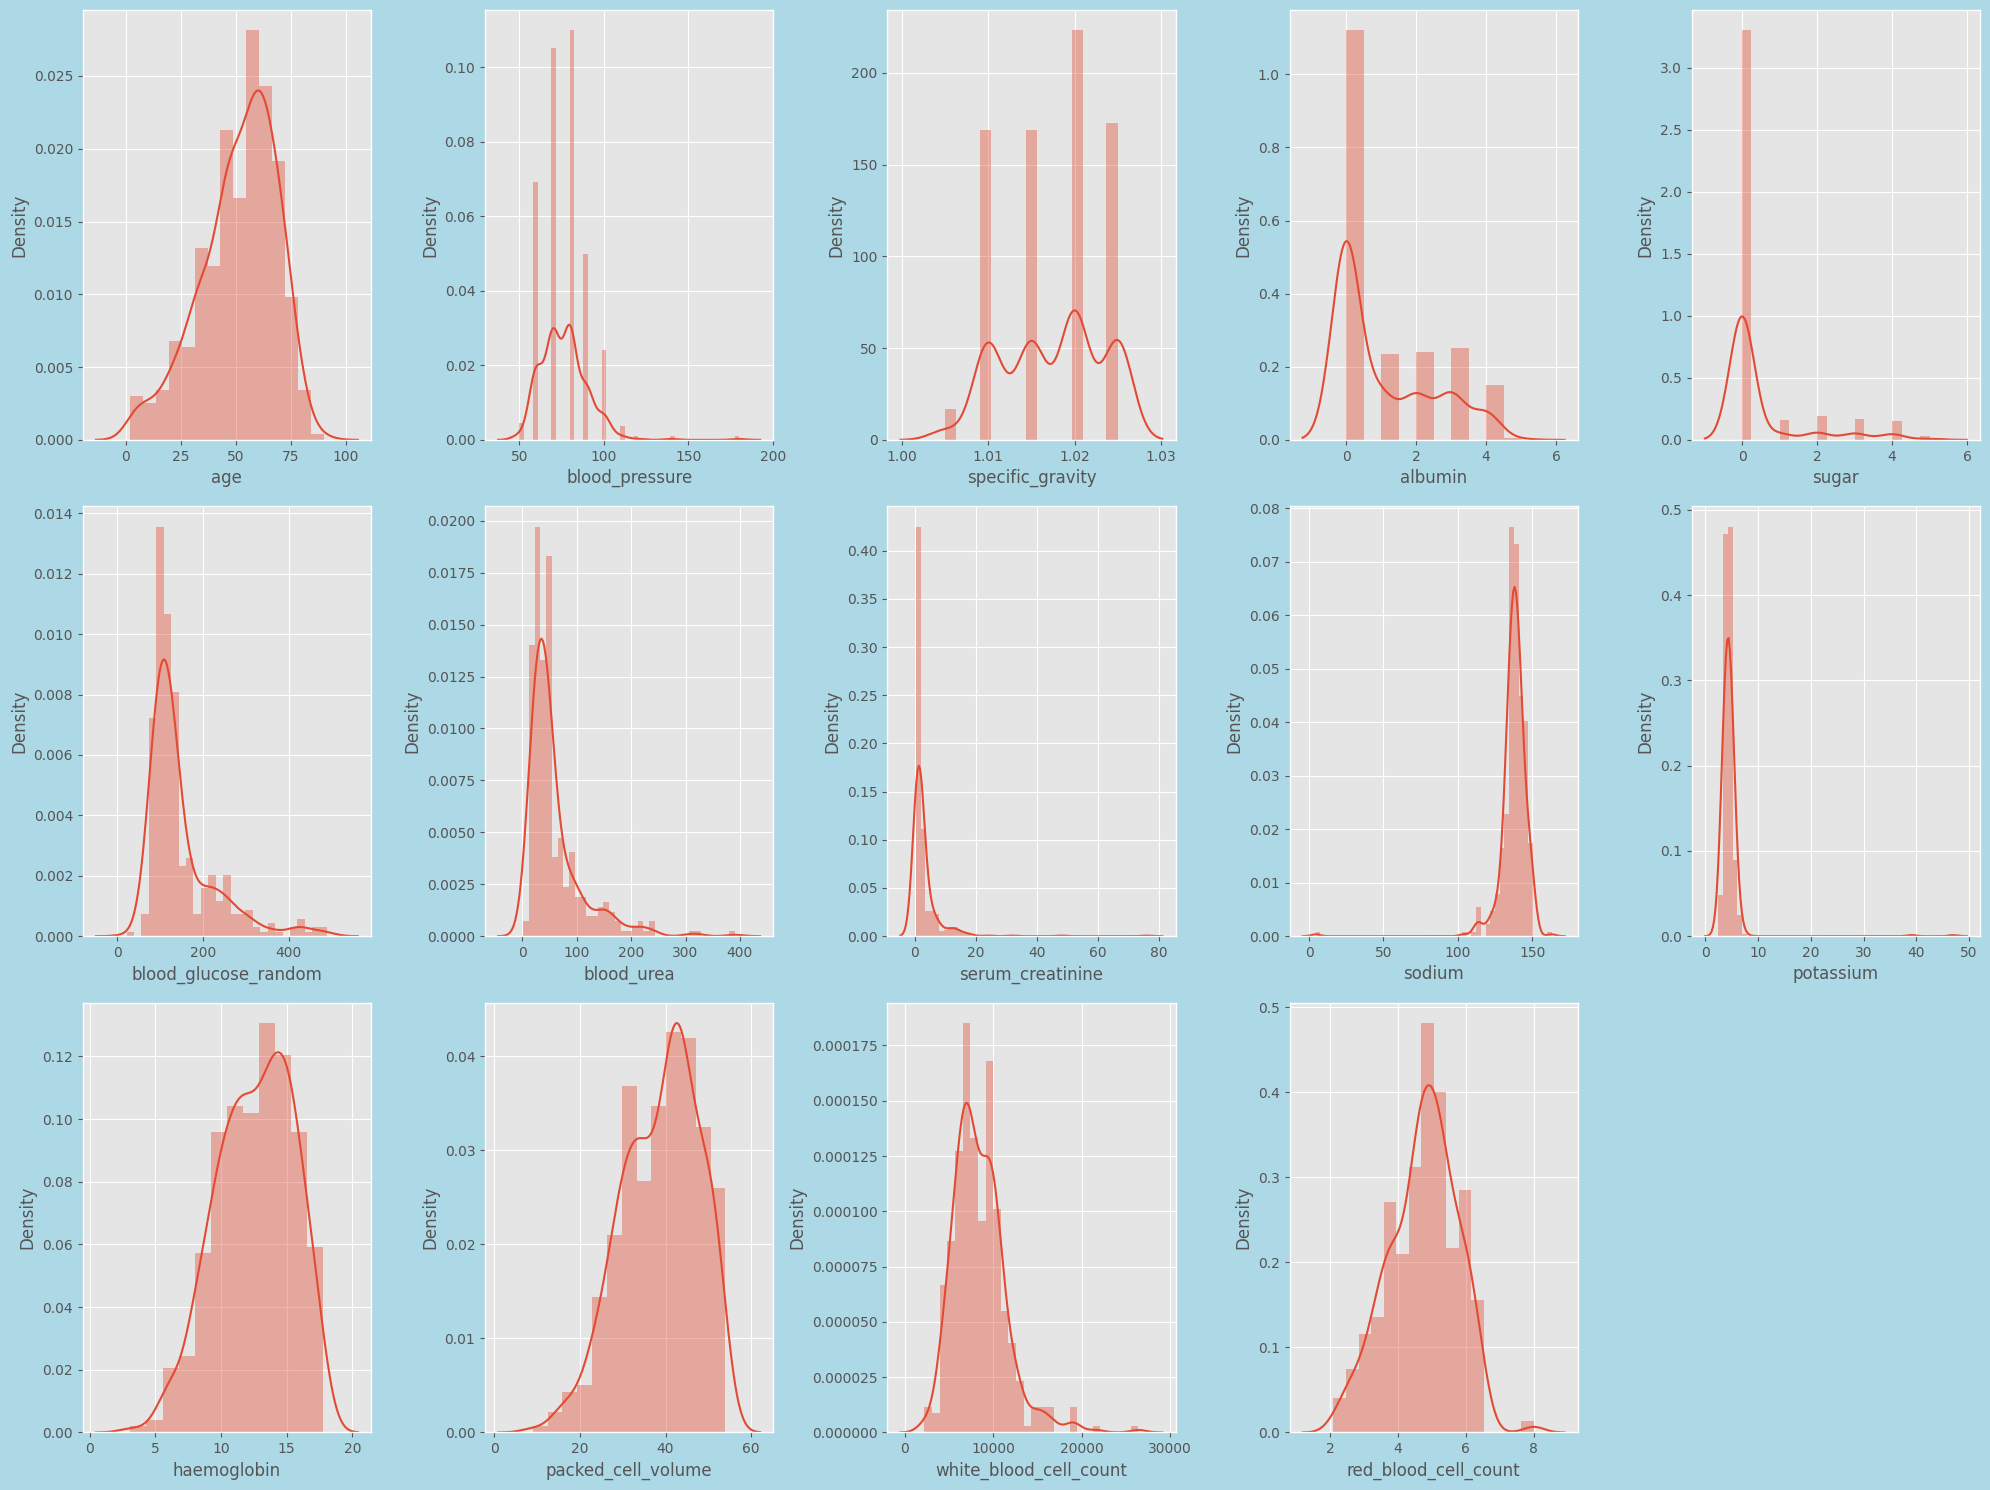

In [ ]:
# memeriksa distribusi fitur numerik

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

**Model Building with All Feature**

In [ ]:
# memisahkan dataset menjadi dua komponen, yaitu fitur (independent variables) dan variabel target (dependent variable)
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [ ]:
X.shape

(400, 24)

In [ ]:
y.shape

(400,)

In [ ]:
# membagi data menjadi training dan test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape

(280, 24)

In [ ]:
y_test.shape

(120,)

**TensorFlow**

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, input_shape=(24,), activation="relu"))
model.add(tf.keras.layers.Dense(units=64, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['acc'])

In [ ]:
history=model.fit(X_train, y_train, epochs=128, batch_size=32, validation_split=0.2)
model.summary()

Epoch 1/128
7/7 [==============================] - 1s 39ms/step - loss: 63.4010 - acc: 0.4777 - val_loss: 20.0807 - val_acc: 0.5357
Epoch 2/128
7/7 [==============================] - 0s 10ms/step - loss: 22.3567 - acc: 0.4643 - val_loss: 15.2687 - val_acc: 0.5357
Epoch 3/128
7/7 [==============================] - 0s 8ms/step - loss: 14.3530 - acc: 0.4911 - val_loss: 8.8595 - val_acc: 0.4286
Epoch 4/128
7/7 [==============================] - 0s 10ms/step - loss: 24.4137 - acc: 0.5089 - val_loss: 29.7006 - val_acc: 0.5536
Epoch 5/128
7/7 [==============================] - 0s 7ms/step - loss: 23.4059 - acc: 0.5089 - val_loss: 38.9778 - val_acc: 0.5536
Epoch 6/128
7/7 [==============================] - 0s 7ms/step - loss: 15.2149 - acc: 0.5402 - val_loss: 4.9624 - val_acc: 0.3393
Epoch 7/128
7/7 [==============================] - 0s 10ms/step - loss: 8.1937 - acc: 0.5089 - val_loss: 10.7581 - val_acc: 0.5536
Epoch 8/128
7/7 [==============================] - 0s 9ms/step - loss: 8.5953 - ac

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(X_train, y_train)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# list all data in history
print(history.history.keys())

9/9 [==============================] - 0s 2ms/step - loss: 1.8299 - acc: 0.8500
Loss: 1.829862117767334, Accuracy: 0.8500000238418579
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


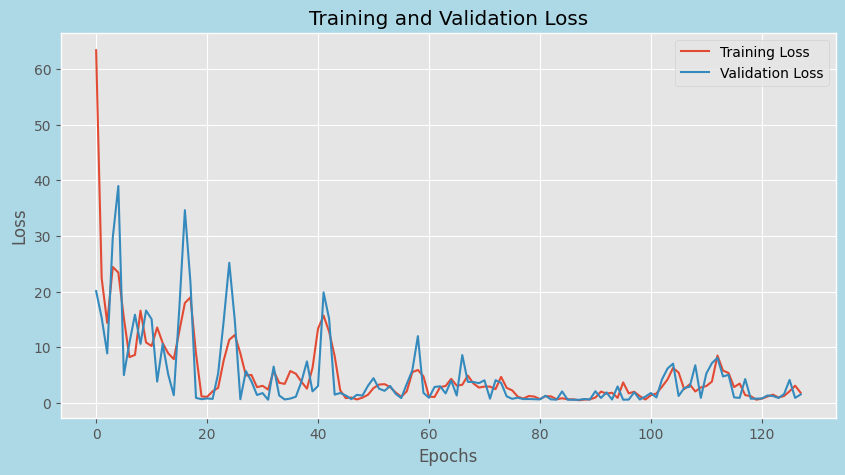

In [ ]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

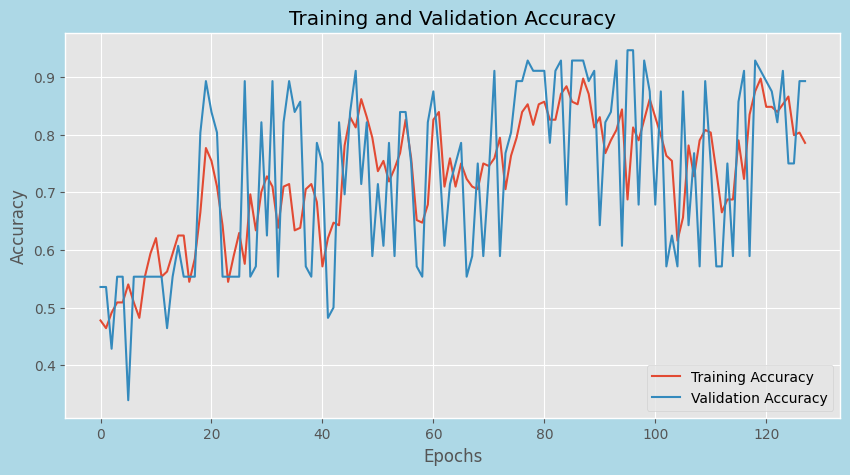

In [ ]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# make class predictions with the model
predictions = (model.predict(X_test) > 0.5)


4/4 [==============================] - 0s 3ms/step


In [ ]:
predictions.shape

(120, 1)

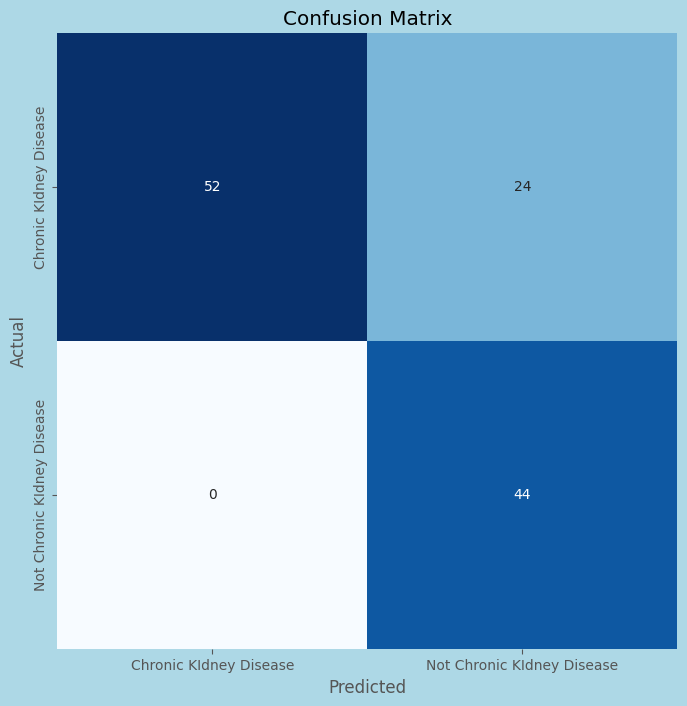

Classification Report:
----------------------
                             precision    recall  f1-score   support

    Chronic KIdney Disease       1.00      0.68      0.81        76
Not Chronic KIdney Disease       0.65      1.00      0.79        44

                  accuracy                           0.80       120
                 macro avg       0.82      0.84      0.80       120
              weighted avg       0.87      0.80      0.80       120



In [ ]:
cm = confusion_matrix(y_test, predictions)
clr = classification_report(y_test, predictions, target_names=["Chronic KIdney Disease", "Not Chronic KIdney Disease"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["Chronic KIdney Disease", "Not Chronic KIdney Disease"])
plt.yticks(np.arange(2) + 0.5, ["Chronic KIdney Disease", "Not Chronic KIdney Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Jadi dari hasil performa pengujian yang dilakukan diketahui bahwa:
model hampir selalu benar dalam memprediksi kelas "Chronic Kidney Disease", Namun, dari total sampel kelas "Chronic Kidney Disease" hanya mampu mengenali true positive sebesar 67 % dengan nilai F1-score 0.8. Sedangkan pada kelas "Not Chronic KIdney Disease" model hanya mampu memprediksi kelasnya sebesar 64%, Namun model dapat mengenali true positive sampel kelas tersebut dengan maksimal, dengan f1-score 0.78.

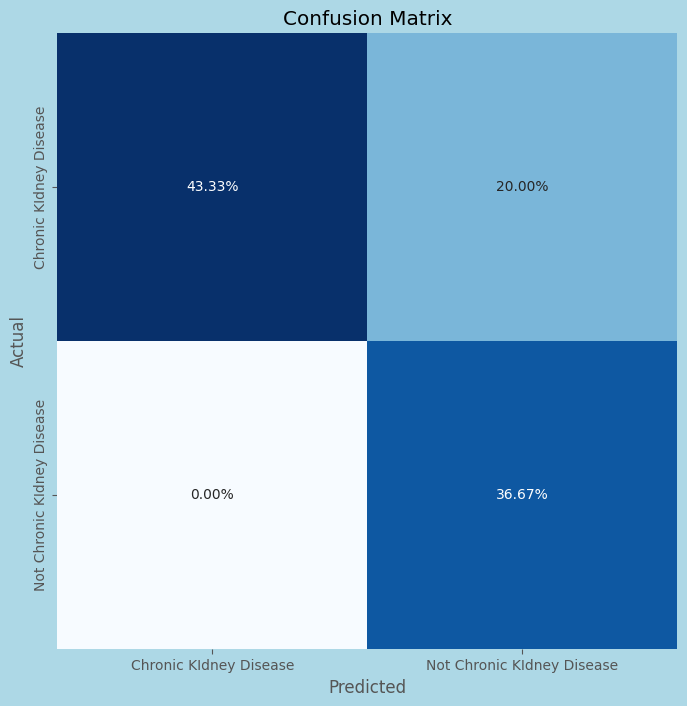

Classification Report:
----------------------
                             precision    recall  f1-score   support

    Chronic KIdney Disease       1.00      0.68      0.81        76
Not Chronic KIdney Disease       0.65      1.00      0.79        44

                  accuracy                           0.80       120
                 macro avg       0.82      0.84      0.80       120
              weighted avg       0.87      0.80      0.80       120



In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["Chronic KIdney Disease", "Not Chronic KIdney Disease"])
plt.yticks(np.arange(2) + 0.5, ["Chronic KIdney Disease", "Not Chronic KIdney Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

**ROC Ploting**

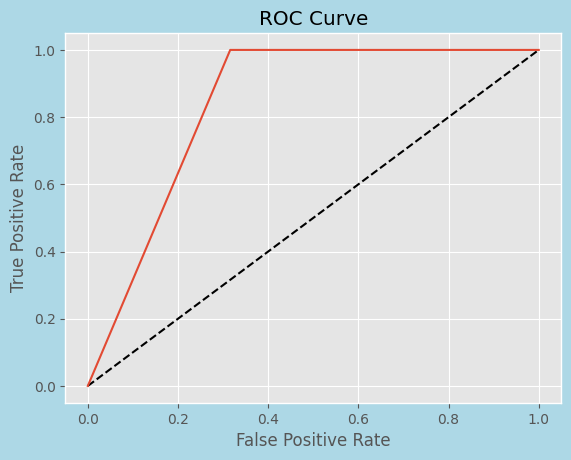

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**Keras Display Model**

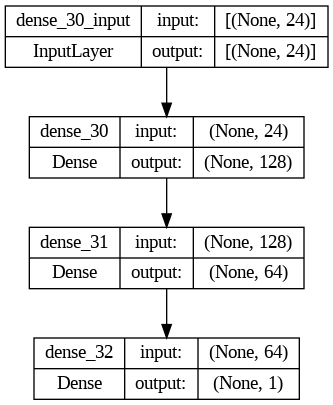

In [ ]:
from IPython.display import Image
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image('model.png')

**Model Building with PCA**

In [ ]:
# normalisasi
X_normed = (X - X.mean()) / X.std()

In [ ]:
# penerapan PCA pada dataset digunakan untuk mengurangi jumlah fitur
pca = PCA()
X_pca = pca.fit_transform(X_normed)

In [ ]:
# explained_variance_ratio_ menunjukkan proporsi varians kumpulan data yang terletak di sepanjang sumbu setiap komponen utama
pca.explained_variance_ratio_

array([0.27756244, 0.07429838, 0.06800308, 0.0523296 , 0.04991962,
       0.04525915, 0.04259554, 0.04106883, 0.03677061, 0.03383486,
       0.03342644, 0.02998293, 0.02846032, 0.02651632, 0.02329659,
       0.02057121, 0.01932644, 0.01870915, 0.01732412, 0.0152572 ,
       0.01325857, 0.01273268, 0.01094996, 0.00854597])

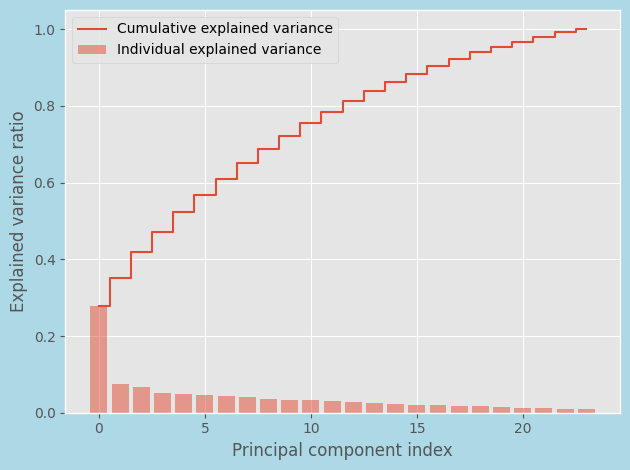

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# mereduksi fitur menjadi 17 fitur pertama dari 24
n_components = 17
X_reduced = np.dot(X_normed.values, pca.components_[:n_components,:].T)
X_reduced = pd.DataFrame(X_reduced, columns=["PC#%d" % (x + 1) for x in range(n_components)])

In [ ]:
X_reduced.shape

(400, 17)

In [ ]:
X_reduced

,PC#1,PC#2,PC#3,PC#4,PC#5,PC#6,PC#7,PC#8,PC#9,PC#10,PC#11,PC#12,PC#13,PC#14,PC#15,PC#16,PC#17
0,-0.768962,-0.694565,0.907562,-0.693024,0.360756,0.106074,0.143212,0.070367,0.176114,0.369736,0.201550,-0.601890,0.616675,-1.097986,-0.331012,0.868090,-0.694201
1,-0.976752,1.516748,-1.391193,0.364331,-0.143348,0.069425,-1.022111,1.730806,-1.085620,-2.562609,0.473129,-0.877669,1.421356,-0.360670,-1.161487,0.424377,-0.404986
2,2.685274,-2.250517,0.540708,-0.623476,-1.562210,0.060644,0.270294,1.813827,-1.070038,0.001780,1.655653,-1.261925,-1.781307,1.740055,-0.424851,-0.459251,1.339631
3,4.055100,2.087498,-2.002197,-0.314372,1.840219,0.638532,-0.051503,-0.387566,-2.037535,1.667971,1.630550,-1.558112,1.046023,0.451819,1.165458,0.370675,1.139604
4,-0.648061,0.536364,-0.227880,-0.213639,0.240762,-0.231862,0.784779,0.663589,-0.138745,-0.544234,-0.913270,-0.807620,0.419624,0.340220,0.781948,0.318665,0.434681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-2.364624,-0.245921,0.138009,0.275920,-0.726970,-0.375797,0.309322,-0.539045,0.193787,-0.015359,-0.112869,-0.143586,0.016132,0.257694,-0.165360,-0.459941,-0.139995
396,-3.444909,0.030337,0.035036,0.277170,0.403588,0.083660,-0.411751,-0.380229,0.211727,0.541750,0.647823,0.313718,-0.340706,-0.326441,0.074317,0.113021,-0.290983
397,-2.871572,0.627497,-0.102552,0.415178,0.172745,-0.298625,-0.218986,0.968132,0.614850,-0.120833,1.063312,-0.154133,0.660472,0.449415,0.339433,0.366544,-0.403840
398,-3.016283,0.671964,0.040916,0.725077,0.443261,0.210350,-1.003901,0.602630,-0.217185,-0.244617,1.153338,0.186102,-0.074128,-0.042344,-0.233537,0.497040,-0.407988


In [ ]:
# data splitting
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, input_shape=(24,), activation="relu"))
model.add(tf.keras.layers.Dense(units=64, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['acc'])

In [ ]:
history=model.fit(X_train, y_train, epochs=128, batch_size=32, validation_split=0.2)
model.summary()

Epoch 1/128
7/7 [==============================] - 1s 37ms/step - loss: 74.4406 - acc: 0.5446 - val_loss: 52.6925 - val_acc: 0.5536
Epoch 2/128
7/7 [==============================] - 0s 10ms/step - loss: 26.4413 - acc: 0.5625 - val_loss: 9.3073 - val_acc: 0.5536
Epoch 3/128
7/7 [==============================] - 0s 10ms/step - loss: 13.3784 - acc: 0.5580 - val_loss: 18.8293 - val_acc: 0.5536
Epoch 4/128
7/7 [==============================] - 0s 7ms/step - loss: 14.1674 - acc: 0.5714 - val_loss: 28.1942 - val_acc: 0.5536
Epoch 5/128
7/7 [==============================] - 0s 9ms/step - loss: 16.4921 - acc: 0.5179 - val_loss: 27.7176 - val_acc: 0.5536
Epoch 6/128
7/7 [==============================] - 0s 9ms/step - loss: 24.8536 - acc: 0.5491 - val_loss: 15.3310 - val_acc: 0.4464
Epoch 7/128
7/7 [==============================] - 0s 7ms/step - loss: 21.0364 - acc: 0.5670 - val_loss: 11.5765 - val_acc: 0.4464
Epoch 8/128
7/7 [==============================] - 0s 8ms/step - loss: 14.9556 - 

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(X_train, y_train)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# list all data in history
print(history.history.keys())

9/9 [==============================] - 0s 3ms/step - loss: 1.1238 - acc: 0.8821
Loss: 1.1237845420837402, Accuracy: 0.8821428418159485
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


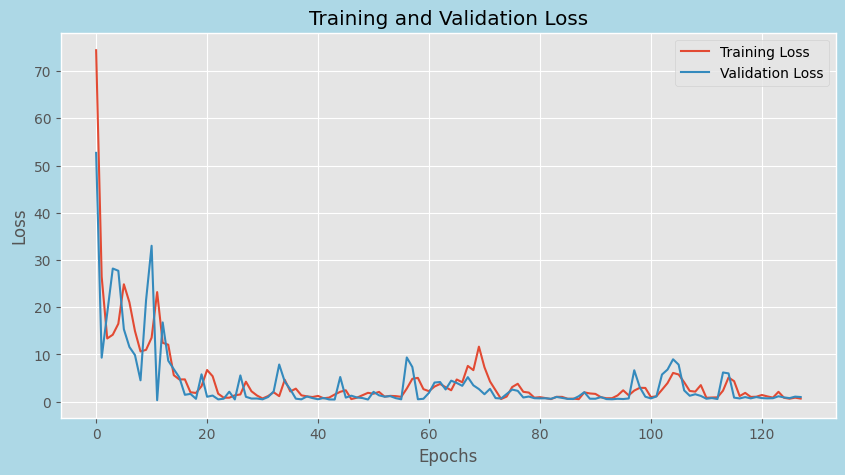

In [ ]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

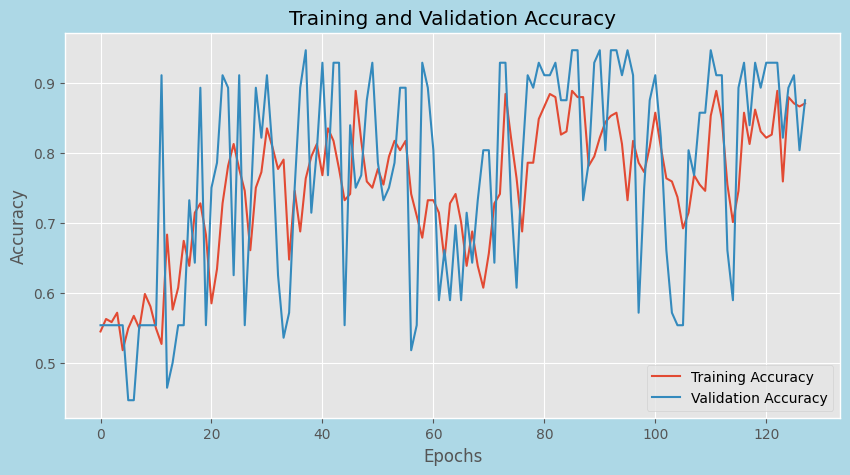

In [ ]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# make class predictions with the model
predictions = (model.predict(X_test) > 0.5)


4/4 [==============================] - 0s 3ms/step


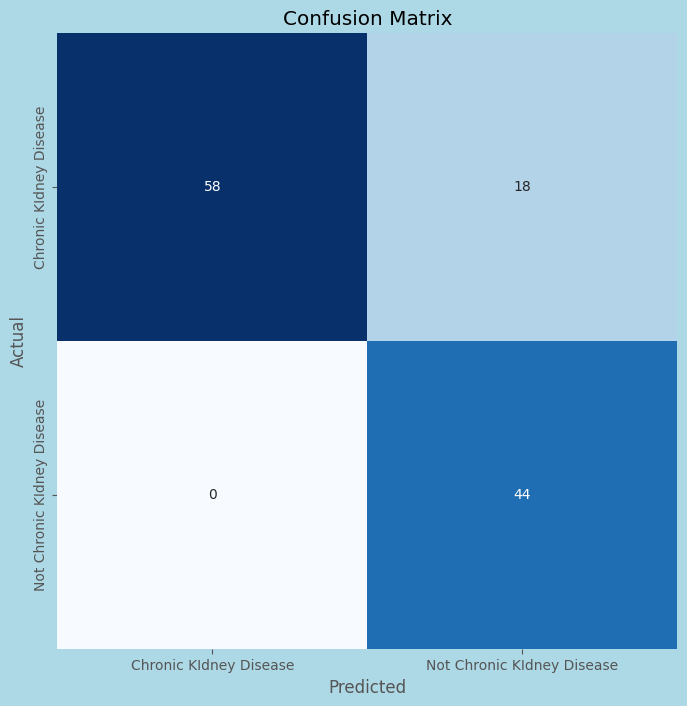

Classification Report:
----------------------
                             precision    recall  f1-score   support

    Chronic KIdney Disease       1.00      0.76      0.87        76
Not Chronic KIdney Disease       0.71      1.00      0.83        44

                  accuracy                           0.85       120
                 macro avg       0.85      0.88      0.85       120
              weighted avg       0.89      0.85      0.85       120



In [ ]:
cm = confusion_matrix(y_test, predictions)
clr = classification_report(y_test, predictions, target_names=["Chronic KIdney Disease", "Not Chronic KIdney Disease"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["Chronic KIdney Disease", "Not Chronic KIdney Disease"])
plt.yticks(np.arange(2) + 0.5, ["Chronic KIdney Disease", "Not Chronic KIdney Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

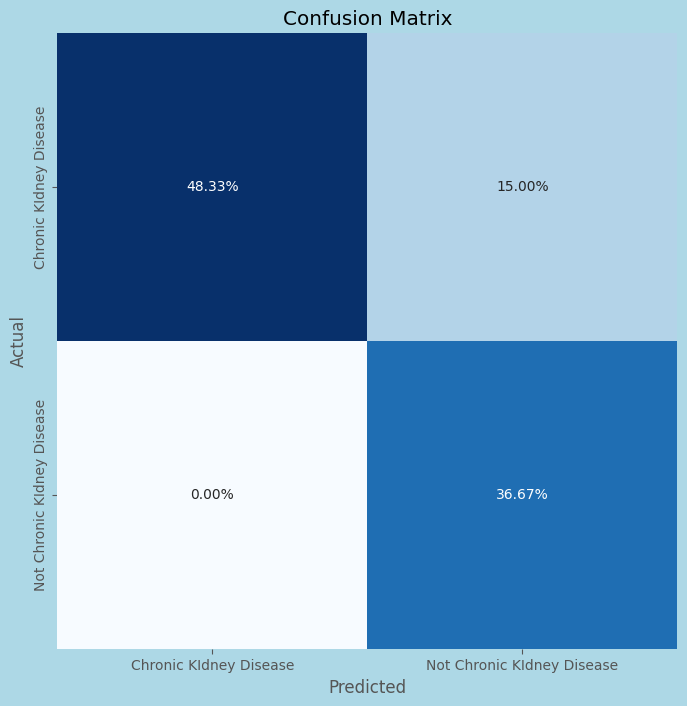

Classification Report:
----------------------
                             precision    recall  f1-score   support

    Chronic KIdney Disease       1.00      0.76      0.87        76
Not Chronic KIdney Disease       0.71      1.00      0.83        44

                  accuracy                           0.85       120
                 macro avg       0.85      0.88      0.85       120
              weighted avg       0.89      0.85      0.85       120



In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["Chronic KIdney Disease", "Not Chronic KIdney Disease"])
plt.yticks(np.arange(2) + 0.5, ["Chronic KIdney Disease", "Not Chronic KIdney Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Setelah dilakukan reduksi dimensi dengan mengambil persentase 90% varians yang dijelaskan pada 17 fitur pertama dari total 24 fitur, didapatkan hasil sebagai berikut:

Model hampir selalu benar dalam memprediksi kelas "Chronic Kidney Disease", Namun, dari total sampel kelas "Chronic Kidney Disease" hanya mampu mengenali true positive sebesar 86 % yang mana hasil tersebut mengelami kenaikan dari sebelumnya sebesar 19%, dengan f1-score 0.92. Sedangkan pada kelas "Not Chronic KIdney Disease" model mampu memprediksi kelasnya sebesar 80% yang mana hasil tersebut juga naik sebesar 16% dari sebelumnya, Namun model dapat mengenali true positive sampel kelas tersebut dengan maksimal, dengan f1-score 0.89.

**ROC Ploting**

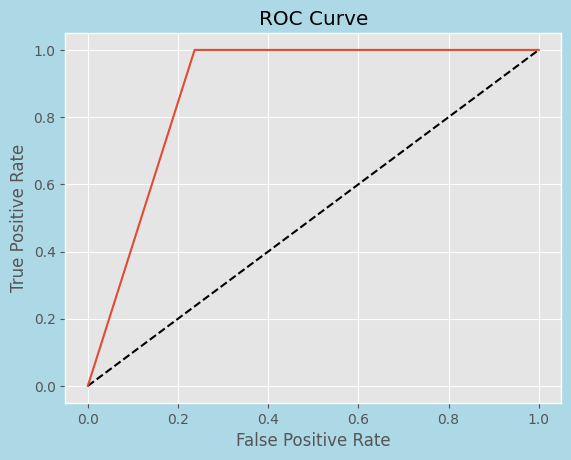

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()